In [1]:
from ipywidgets import interact, fixed, interactive
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
#from IPython.html import widgets
#from IPython.html.widgets import interact
#from IPython.display import display
import train as tn
reload(tn)

import plotting
reload(plotting)

import util as ut
plt.style.use('seaborn-poster')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import itertools


Welcome to ROOTaaS 6.06/08


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap,origin='lower')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)

    
    #print(cm)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('true category')
    plt.xlabel('predicted category')


In [3]:
def GetFitter ( dataDir='./data', 
                inputName="effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out", 
                inputDir='./classifiers' ) :
    #----------------------------------------------------------------------------
    ut.defaultParameters(dataDir=dataDir, inputName=inputName, inputDir=inputDir)
    ut.setParams()
    effFitter = ut.loadOrMake()
    #----------------------------------------------------------------------------
    return effFitter

In [4]:
def PlotConfusionMatrix(effFitter,
                        classifier_name,
                        recoCatIncluded = True,
                        normalized = True,
                         ) :
   
   

    #----------------------------------------------------------------------------
    df = effFitter.df
    first_train_evt = int(round(df.index.size*(1.-effFitter.split_frac)))

    #take the test sample 
    df_test = df[:first_train_evt]
    #----------------------------------------------------------------------------

    
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    #This part needs imporvement : ASK PASQUALE HOW TO GET XBRANCHES!!!!!!!!!!
    if 'recoNjets' in classifier_name :
        Xbr = ["genJet2p5Pt0", "genJet2p5Rapidity0",
                                    "genJet2p5Pt1", "genJet2p5Rapidity1",
                                    "genJet2p5Pt2", "genJet2p5Rapidity2",
                                    "genJet2p5Pt3", "genJet2p5Rapidity3",
                                    "genPt","absGenRapidity",
                   'class_prob_0','class_prob_1','class_prob_2','class_prob_3'
             ]
    if 'recoPt' in classifier_name :
        Xbr = ["genPt", "absGenRapidity",
                   'class_prob_0','class_prob_1','class_prob_2','class_prob_3'
             ]
    if 'class' in classifier_name :
        Xbr = ["genPt", "absGenRapidity",
             ]
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    

    #----------------------------------------------------------------------------    
    X_test = df_test[Xbr].values
    clf = effFitter.clfs[classifier_name]
    y_pred = clf.predict(X_test)
    
    
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    #This part needs imporvement
    if 'class' in classifier_name :
        Ybr = classifier_name
    else :
        Ybr = classifier_name+'Cat'
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    y_test = df_test[Ybr].values
    #----------------------------------------------------------------------------

    cnf_matrix = confusion_matrix(y_test, y_pred,sample_weight=df_test['absweight'].values)
    if recoCatIncluded :
        class_names = np.arange(y_test.max()+2) -1
        
    else :
        cnf_matrix = cnf_matrix[1::,1::]
        class_names = np.arange(y_test.max()+2) 
    
    np.set_printoptions(precision=1)

    plt.figure(figsize=(12,12))
    if normalized :
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix '+classifier_name, normalize=True)
    else :
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix '+classifier_name)

    plt.show()
    

In [5]:
fitterObject = interactive(GetFitter, dataDir ='./data',
                    inputName="effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out", 
                    inputDir='./classifiers')
display(fitterObject)

entered config files named my_train_config
None
Load object with the name Train_Configurable_Refactor_higgs_model_dep_1702482 and the following paramters 
./classifiers
./classifiers/Train_Configurable_Refactor_higgs_model_dep_1702482.pkl.gz
loading pickle ./classifiers/Train_Configurable_Refactor_higgs_model_dep_1702482.pkl.gz
loading data ./classifiers/Train_Configurable_Refactor_higgs_model_dep_1702482.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity',
       u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class

Normalized confusion matrix


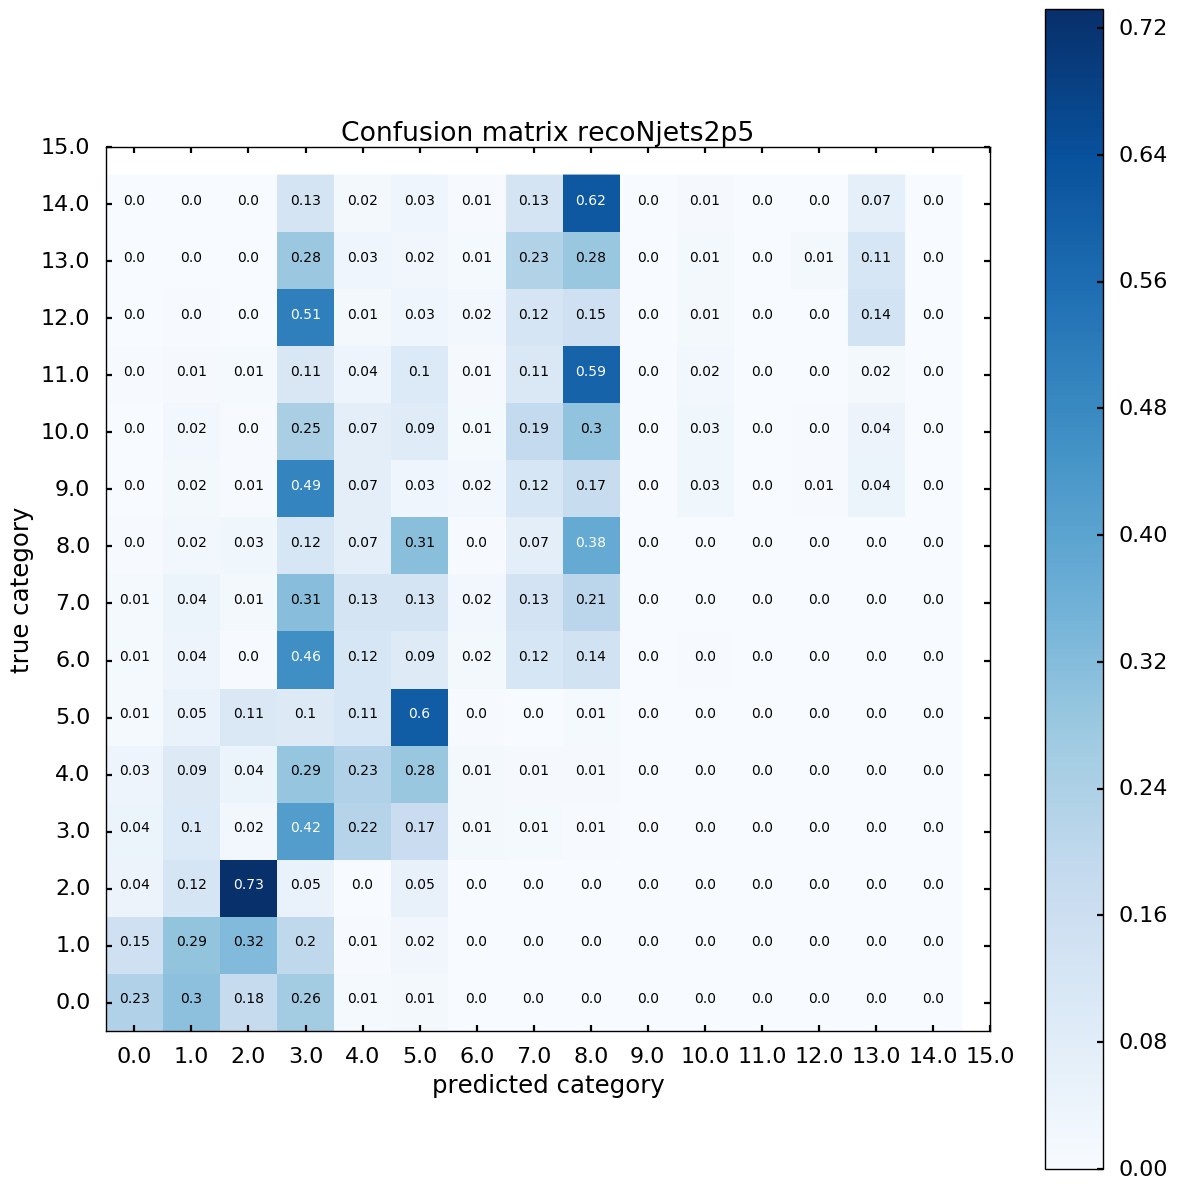

In [7]:
interact(PlotConfusionMatrix,effFitter = fixed(fitterObject.result),
                             classifier_name = {'recoNjets2p5':'recoNjets2p5',
                                           'recoPt' : 'recoPt' ,
                                           'class' : 'class' },
                             recoCatIncluded = {'Yes' : True,
                                               'No' : False},
                             normalized = {'Yes' : True,
                                               'No' : False}
         )